# chap.4 ニューラルネットワークの学習

In [36]:
# mnist data の取得

from sklearn.datasets import fetch_openml

mnist = fetch_openml(name='mnist_784', version=1, data_home=".")
mnist


/Users/omitsuhashi/.local/share/virtualenvs/tae-machine-learning-Gh8zrVJR/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

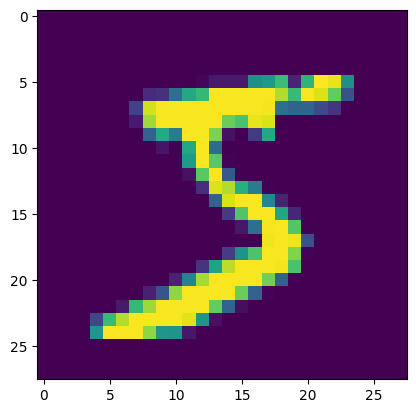

In [37]:
from matplotlib import pyplot as plt

first = mnist.get('data')[0:1].to_numpy()

plt.imshow(first.reshape(28,28), )
plt.show()


## 損失関数

最適なパラメータを探索するための指標であり、この数値は「悪さ」を表している

### 2乗和誤差


#### 定義

$$ E = { 1 \over 2 } \sum_{k} (y_k-t_k)^2 $$

In [38]:
import numpy as np


def mean_squared_error(y: np.ndarray, t: np.ndarray) ->  float:
    return 1 / 2 * np.sum((y-t) ** 2)


# 以下、mnistの例で考えてみる

y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
y_2 = np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
(mean_squared_error(y, t), mean_squared_error(y_2, t))


(0.09750000000000003, 0.5975)

### 交差エントロピー誤差

#### 定義

$$ E = - \sum_{k} t_k \log(y_k) $$


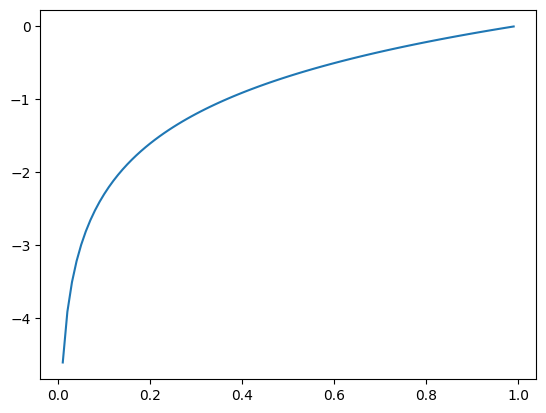

In [39]:
def cross_entropy_error(y: np.ndarray, t: np.ndarray) -> float:
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

x = np.arange(0.01, 1, 0.01)
y_tmp = np.log(x)

plt.plot(x, y_tmp)
plt.show()


In [40]:
(cross_entropy_error(y, t), cross_entropy_error(y_2, t))


(0.510825457099338, 2.302584092994546)

## 損失関数を最適化するための数値計算


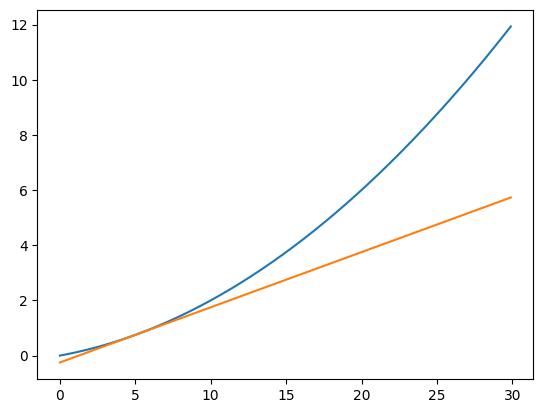

In [53]:
from typing import Callable


# 2次元関数の微分

# その点での傾き
def numerical_diff(f: Callable, x: float) -> float:
    h = 1e-4
    return (f(x + h) - f(x)) / h

def function_1(x: np.ndarray) -> np.ndarray:
    return 0.01 * x ** 2 + 0.1 * x

def tangent_lint(f: Callable, x: float) -> Callable[[np.ndarray], np.ndarray]:
    d = numerical_diff(f, x)
    # f(x)はxの地点での切片で、d * x を引くことで x = 0 の地点での切片を求めている
    b = f(x) - d * x
    return lambda t: d * t + b


x = np.arange(0, 30, 0.1)
y = function_1(x)
df = tangent_lint(function_1, 5)
y2 = df(x)

plt.plot(x, y)
plt.plot(x, y2)

plt.show()



In [ ]:
# 3次元の微分と勾配を求める

# 以下、全体像を把握して細かい数値計算も知りたくなったらやる
